## **Local Regression - a trivial implementation.**
### This notebook is a hands on implementation study of local regression, a techinique used in time series analysis

## Local regression is a smoothing techinque that apply as the name sugests, a linear regression using a defined k window as training data in each point of the series. This implementation use a non weighted window, so the each model in each point is trained with the original data.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import time
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):a
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
data = pd.read_csv("/kaggle/input/daily-website-visitors/daily-website-visitors.csv",parse_dates = ["Date"],thousands=',')
data = data.set_index("Date").to_period('D')
data.head()

,Row,Day,Day.Of.Week,Page.Loads,Unique.Visits,First.Time.Visits,Returning.Visits
Date,,,,,,,
2014-09-14,1,Sunday,1,2146,1582,1430,152
2014-09-15,2,Monday,2,3621,2528,2297,231
2014-09-16,3,Tuesday,3,3698,2630,2352,278
2014-09-17,4,Wednesday,4,3667,2614,2327,287
2014-09-18,5,Thursday,5,3316,2366,2130,236


<Axes: xlabel='Date'>

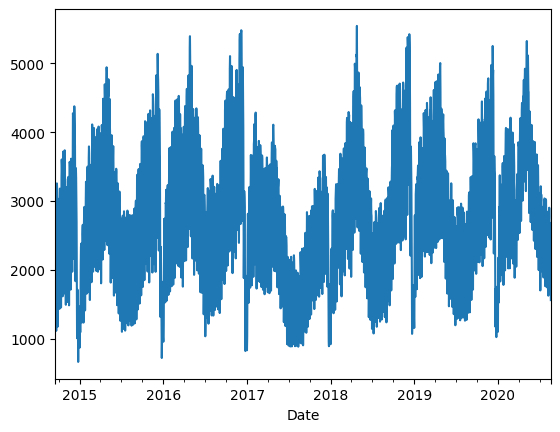

In [3]:
data["Unique.Visits"].plot()

In [4]:
def local_regression(k,data):
    
    ## The k parameter control the window sike
    ## In this implementation, k it always be an odd number
    
    k = k if k % 2 != 0 else k + 1
    fitted_points  = np.zeros(data.size)
    
    for i in range(0,data.size):
        window_side = int(k / 2)
        left_half = max(0,i - window_side)
        right_half = min(data.size - 1, i + window_side)
        data_train = data[left_half:right_half + 1]          
        linear_m = LinearRegression(fit_intercept = True)
        x = np.array(list(range(left_half,right_half + 1))).reshape(-1,1)           
        try:
            linear_m.fit(x,  data_train)

        except:
            print(window_side)
            print(data_train.shape)
            print(x.shape)
        fitted_points[i] = linear_m.predict([[i]])[0][0]

    return fitted_points

In [5]:
k = 15
smoothed_data = local_regression(k,data["Unique.Visits"].values.reshape(-1,1))

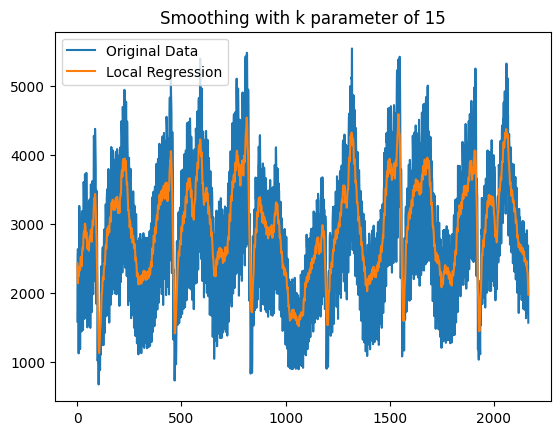

In [6]:
plt.plot(data["Unique.Visits"].values)
plt.title(f"Smoothing with k parameter of {k}")
plt.plot(smoothed_data)
plt.legend(["Original Data","Local Regression"])
plt.show()

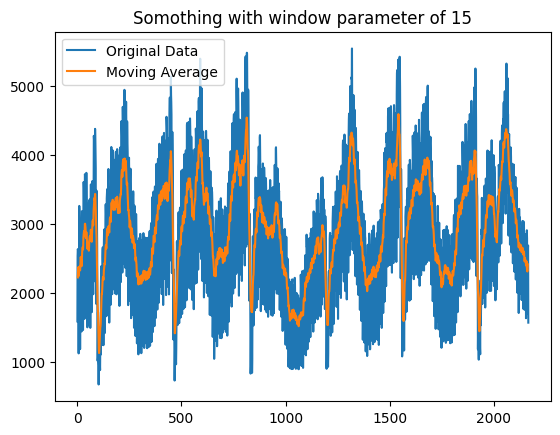

In [7]:
window_mavg = 15
movin_average = data["Unique.Visits"].rolling(window = window_mavg ,center=True,      
    min_periods=10).mean().to_frame()
plt.plot(data["Unique.Visits"].values)
plt.plot(movin_average["Unique.Visits"].values)
plt.title(f"Somothing with window parameter of {window_mavg}")
plt.legend(["Original Data","Moving Average"])

plt.show()

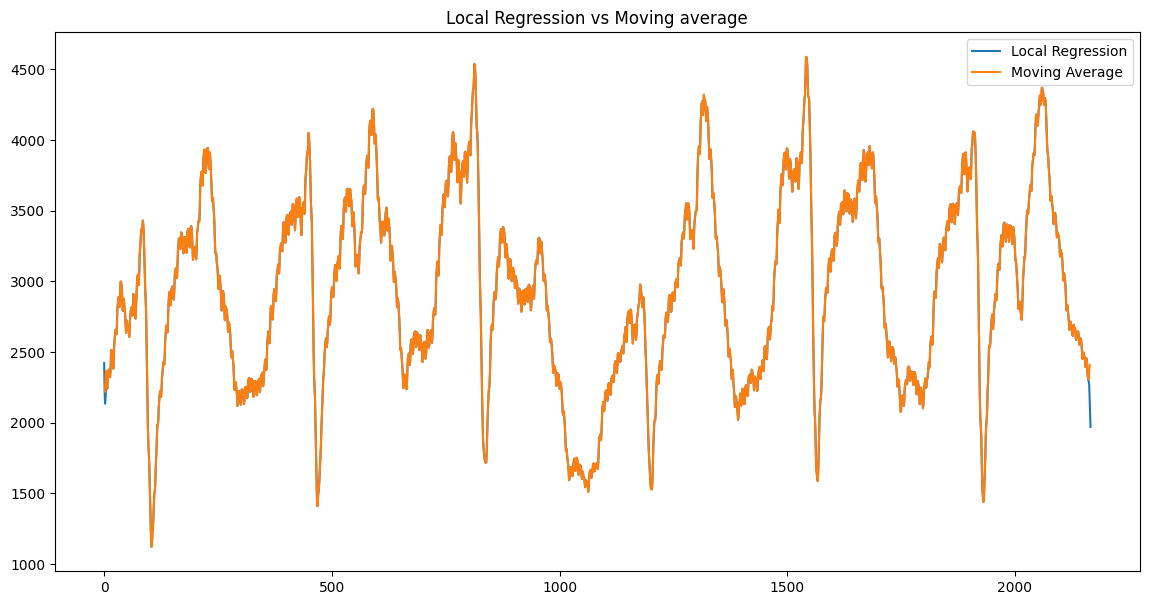

In [8]:
# plt.plot(data["Unique.Visits"].values)
plt.figure(figsize=(14, 7))
plt.plot(smoothed_data)
plt.plot(movin_average["Unique.Visits"].values)
plt.title("Local Regression vs Moving average")
plt.legend(["Local Regression" ,"Moving Average"])
plt.show()

## An non weighted local regression differs from a moving average, basicaly only in the extremes of the series, where the moving average suffer a distortion due the lack of data.This difference becomes clearer as the k value, or the window size value grothws. Bellow is used a window size way bigger, not more for just a noise reduction purpose but to capture the trend-cycle of the data.

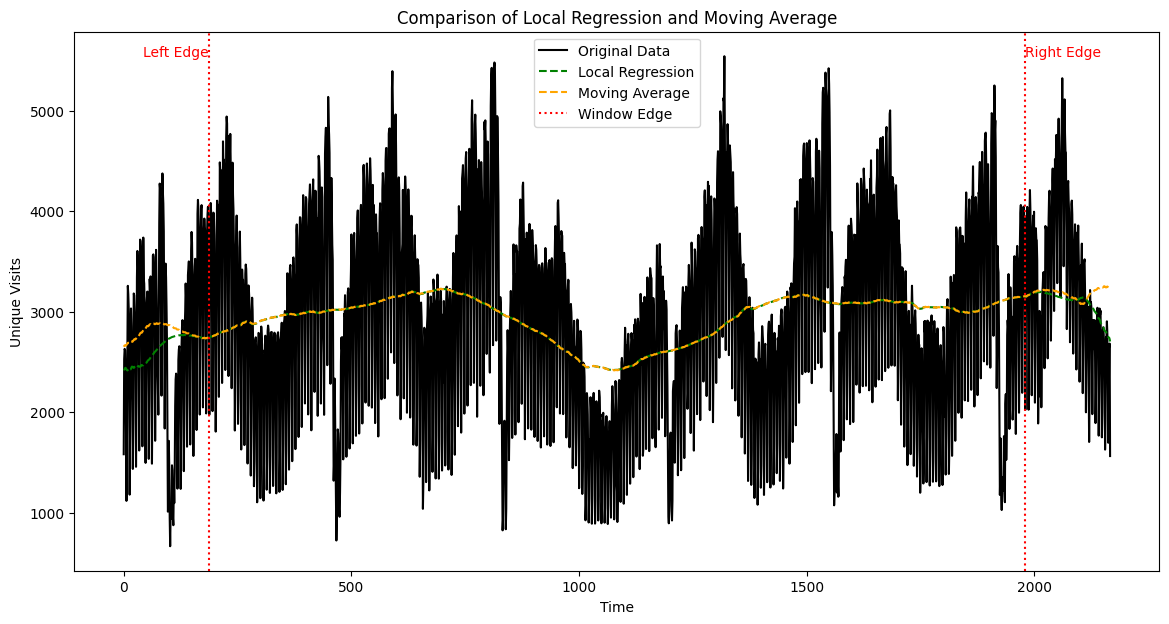

In [9]:
window_size = 375

local_regression_timer = time.time()
smoothed_data = local_regression(370,data["Unique.Visits"].values.reshape(-1,1))
local_regression_timer = time.time() -local_regression_timer

moving_avg_timer = time.time()
movin_average = data["Unique.Visits"].rolling(window = 370 ,center=True,      
    min_periods=30).mean().to_frame()
moving_avg_timer = time.time() -moving_avg_timer

plt.figure(figsize=(14, 7))
plt.plot(data["Unique.Visits"].values, label='Original Data', color='black')
plt.plot(smoothed_data, label='Local Regression', linestyle='--', color='green')
plt.plot(movin_average.values, label='Moving Average', linestyle='--', color='orange')

# Destacar Bordas
left_edge = window_size // 2
right_edge = data["Unique.Visits"].size - window_size // 2

plt.axvline(left_edge, color='r', linestyle=':', label='Window Edge')
plt.axvline(right_edge, color='r', linestyle=':')

plt.text(left_edge, data["Unique.Visits"].max(), 'Left Edge', horizontalalignment='right', color='red')
plt.text(right_edge, data["Unique.Visits"].max(), 'Right Edge', horizontalalignment='left', color='red')

plt.legend()
plt.title('Comparison of Local Regression and Moving Average')
plt.xlabel('Time')
plt.ylabel('Unique Visits')
plt.show()

In [10]:
print(f"Data set {data['Unique.Visits'].size} rows")
print(f"Local Regression time processing: {local_regression_timer}")
print(f"Moving Average time processing: {moving_avg_timer}")

Data set 2167 rows
Local Regression time processing: 1.6353871822357178
Moving Average time processing: 0.0008075237274169922


# Conclusion

## Somoothing wise, local regression can be a better choice over the moving average to prevent the distortion in the ends of the data, but his operation has an way more expensive cost in time processing.

### Comment bellow if you see any error in this notebook. Thanks.